# 1. Import Data

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import plotly.express as px

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data = pd.read_csv("/Users/kathrynkopczenski/Documents/Personal DS Projects/ds_salaries.csv")
df = pd.DataFrame(data)

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.00,3755.00,3755.00,3755.00
mean,2022.37,190695.57,137570.39,46.27
std,0.69,671676.50,63055.63,48.59
min,2020.00,6000.00,5132.00,0.00
25%,2022.00,100000.00,95000.00,0.00
50%,2022.00,138000.00,135000.00,0.00
75%,2023.00,180000.00,175000.00,100.00
max,2023.00,30400000.00,450000.00,100.00


In [5]:
df.duplicated().sum()

1171

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Find the top five data science job titles

In [29]:
entry_counts = df['job_title'].value_counts()
most_common_jobs = entry_counts.head(5)  
print("\nMost Common Jobs:")
print(most_common_jobs)



Most Common Jobs:
job_title
Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
Name: count, dtype: int64


In [28]:
entry_counts = df['salary_in_usd'].value_counts()
most_common_sal = entry_counts.head(5)  
print("\nMost Common Salary:")
print(most_common_sal)


Most Common Salary:
salary_in_usd
100000    58
150000    56
120000    51
200000    47
130000    39
Name: count, dtype: int64


Find the most common data science salaries

In [27]:
mean_salary_by_job = df.groupby('job_title')['salary_in_usd'].mean()
top_five_jobs = mean_salary_by_job.nlargest(5)
top_five_jobs

job_title
Data Science Tech Lead     375000.00
Cloud Data Architect       250000.00
Data Lead                  212500.00
Data Analytics Lead        211254.50
Principal Data Scientist   198171.12
Name: salary_in_usd, dtype: float64

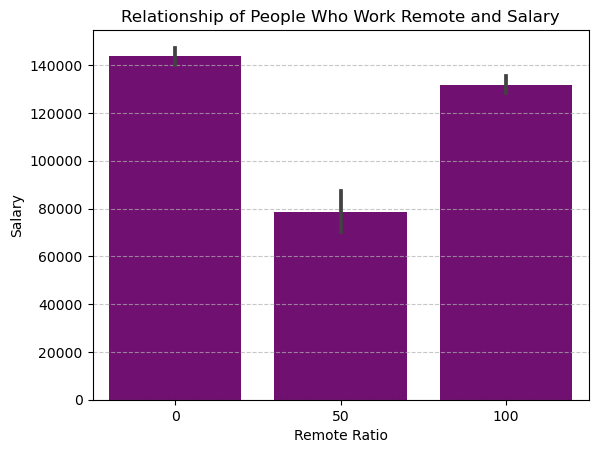

In [38]:
remote_ratio = df["remote_ratio"]
salary = df["salary_in_usd"]

sns.barplot(x=remote_ratio, y=salary, data=df, color='purple')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary')
plt.title('Relationship of People Who Work Remote and Salary')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Bar graph showing the mean salary trends for the top five data science job titles

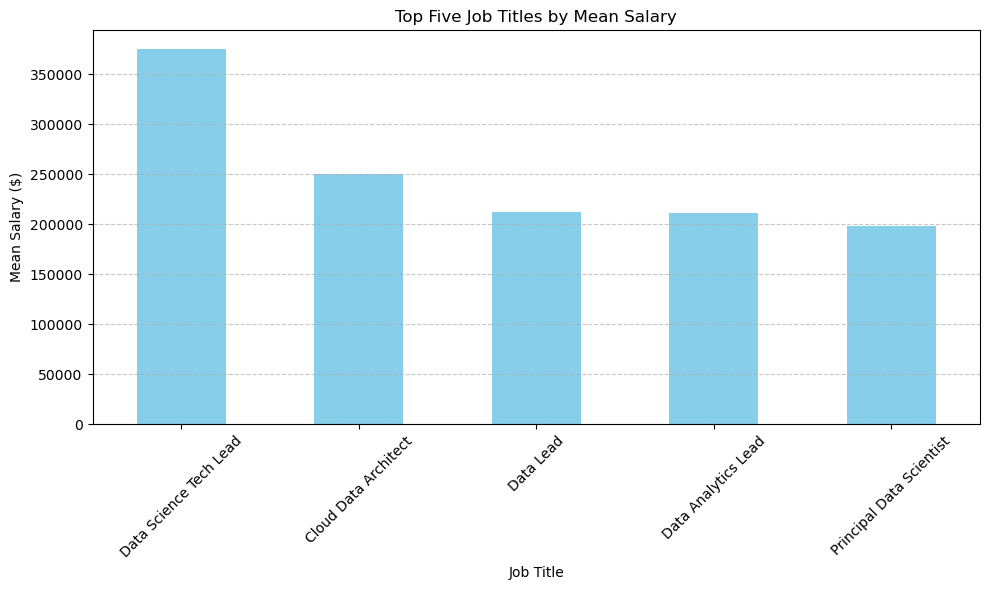

In [31]:
plt.figure(figsize=(10, 6))
top_five_jobs.plot(kind='bar', color='skyblue')
plt.title('Top Five Job Titles by Mean Salary')
plt.xlabel('Job Title')
plt.ylabel('Mean Salary ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

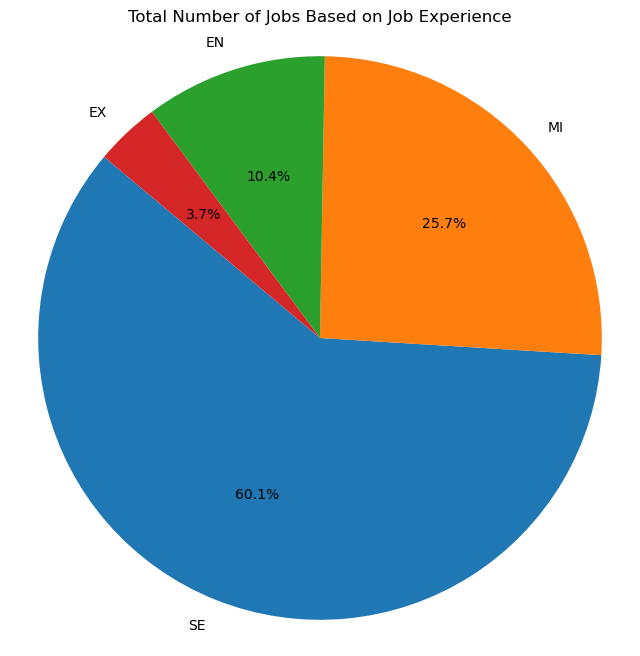

In [36]:
experience_counts = df['experience_level'].value_counts()

# Create labels and sizes for the pie chart
labels = experience_counts.index
sizes = experience_counts.values

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Total Number of Jobs Based on Job Experience')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

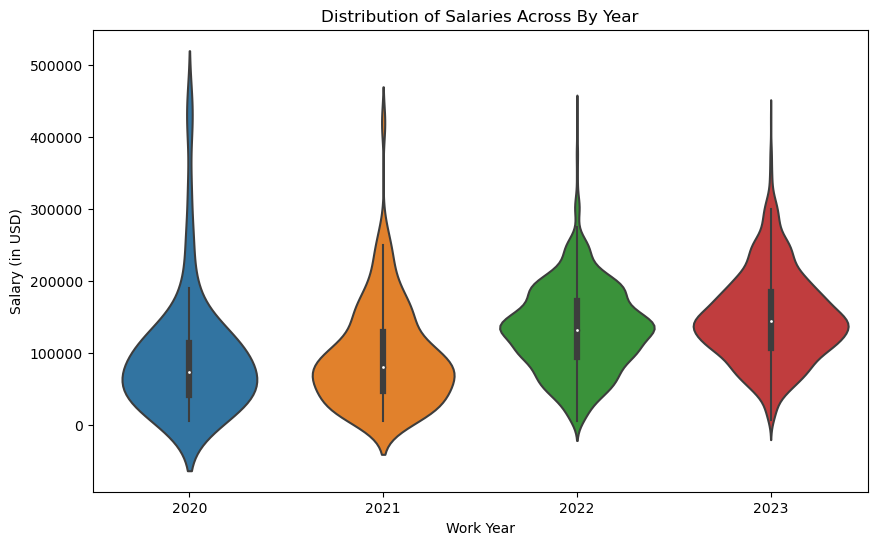

In [37]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='work_year', y='salary_in_usd', data=data)
plt.title('Distribution of Salaries Across By Year')
plt.xlabel('Work Year')
plt.ylabel('Salary (in USD)')
plt.show()